### Program to explore the range of Angles for EXI Red Filter Image
The EXI Instrument's red filter images (VIS 635 (red), 2×2 binning) are used to calculate the Albedo.
The Albedo is compared with the TES instrument data and the difference is analysed.
Below program takes the EXI red filter image (filename contains the string - f635)
and explores the values for angles - 
- phase
- look
- emission
- incidence

Conclusion - Files which have been categorised as low ratio files or unusable for analysis all have a max phase angle < 90
All images have a similar distributions for all other angles



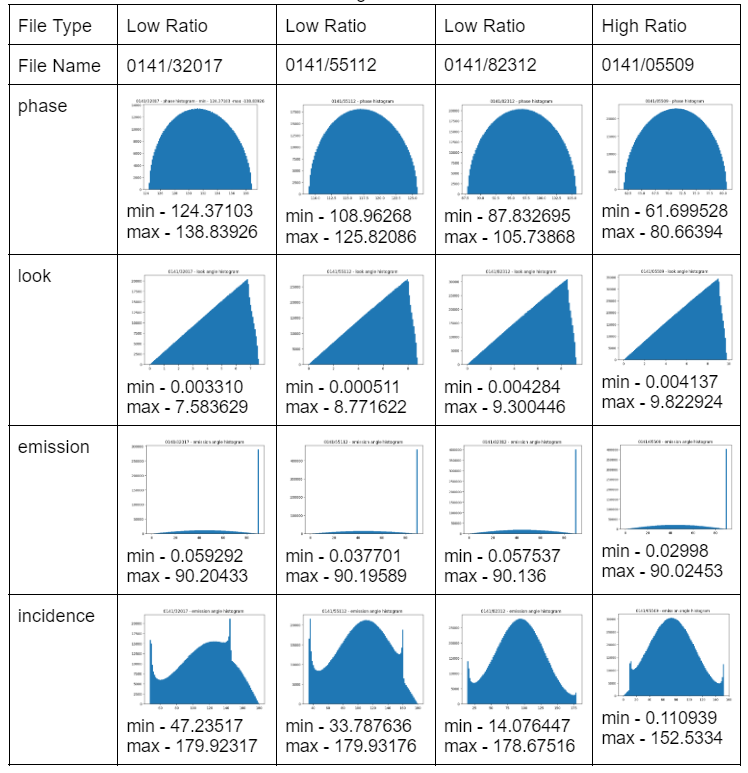


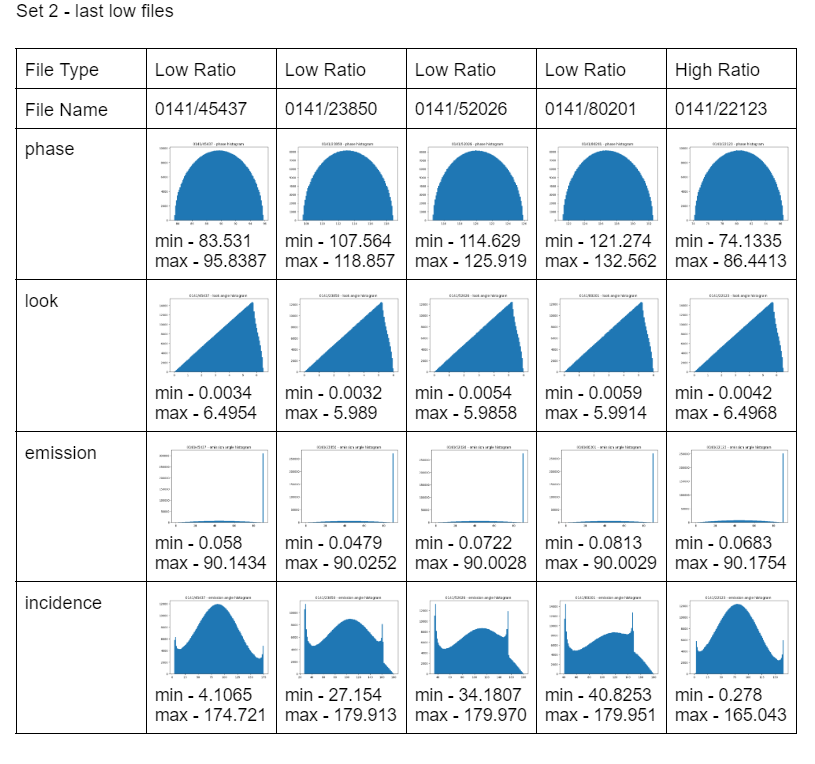

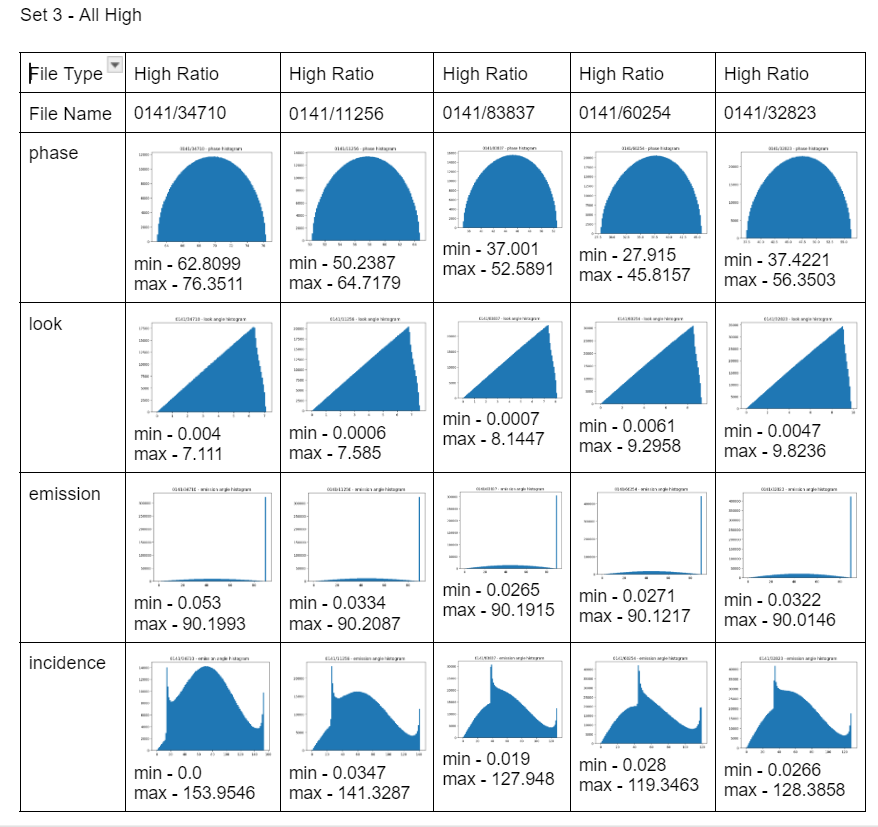

In [1]:
import numpy as np
from datetime import datetime
import os
from astropy.io import fits
import matplotlib.pyplot as plt
import os

In [2]:
# Read one file which has not been picked up to compare data with TES
directory = <enter file directory path>
#file1 = 'emm_exi_l2a_20211201T032017_0141_xos1_f635_f_v06-01.fits.gz' #low first
#file1 = 'emm_exi_l2a_20211201T055112_0141_xos1_f635_f_v06-01.fits.gz' #low first
#file1 = 'emm_exi_l2a_20211201T082312_0141_xos1_f635_f_v06-01.fits.gz' #low first
#file1 = 'emm_exi_l2a_20211201T105509_0141_xos1_f635_f_v06-01.fits.gz' #high first
#file1 = 'emm_exi_l2a_20211202T045437_0141_xos1_f635_f_v06-01.fits.gz' #low last
#file1 = 'emm_exi_l2a_20211202T123850_0141_xos1_f635_f_v06-01.fits.gz'  #low last
#file1 = 'emm_exi_l2a_20211202T152026_0141_xos1_f635_f_v06-01.fits.gz' #low last
#file1 = 'emm_exi_l2a_20211202T180201_0141_xos1_f635_f_v06-01.fits.gz' #low last
#file1 = 'emm_exi_l2a_20211202T022123_0141_xos1_f635_f_v06-01.fits.gz' #high last
#file1 = 'emm_exi_l2a_20211201T234710_0141_xos1_f635_f_v06-01.fits.gz' #high
#file1 = 'emm_exi_l2a_20211201T211256_0141_xos1_f635_f_v06-01.fits.gz' #high
#file1 = 'emm_exi_l2a_20211201T183837_0141_xos1_f635_f_v06-01.fits.gz' #high
#file1 = 'emm_exi_l2a_20211201T160254_0141_xos1_f635_f_v06-01.fits.gz' #high
file1 = 'emm_exi_l2a_20211201T132823_0141_xos1_f635_f_v06-01.fits.gz' #high

In [14]:
# Get a unique identifier to highlight as plot title
txt = file1.split('_')[4]+'/'+file1.split('_')[3][-5:]
txt

'0141/32823'

In [4]:
# Extract File details and store 

filename = directory + file1

with fits.open(filename) as hdul:
        # Process the albedo data
        albedo = hdul['ALBEDO'].data
#        hdul = fits.open(filename)
        lat = hdul['LAT'].data
        long = hdul['LONG'].data
        sci = hdul['SCI'].data
        albedo = hdul['ALBEDO'].data
        incidence = hdul['INA'].data
        emission = hdul['EMA'].data
        height = hdul['HEIGHT'].data
        dqf = hdul['DQF'].data
        phase = hdul['PHA'].data
        look = hdul['LOOK'].data
        


min - 37.4221
max - 56.3503


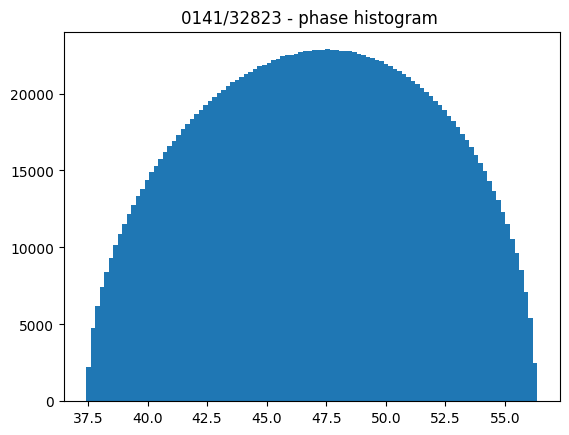

In [141]:
# Plot histogram for phase angle
plt.hist(phase[~np.isnan(phase)], bins=100)
plt.title(txt + ' - phase histogram ')

print('min - ' + str(round(np.nanmin(phase),4)))
print('max - ' + str(round(np.nanmax(phase),4)))

min - 0.0047
max - 9.8236


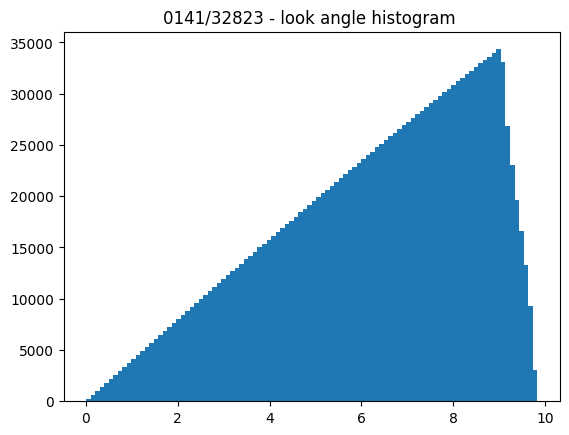

In [142]:
# Plot histogram for look angle
plt.hist(look[~np.isnan(look)], bins=100)
plt.title(txt + ' - look angle histogram ')
print('min - ' + str(round(np.nanmin(look),4)))
print('max - ' + str(round(np.nanmax(look),4)))

min - 0.0322
max - 90.0146


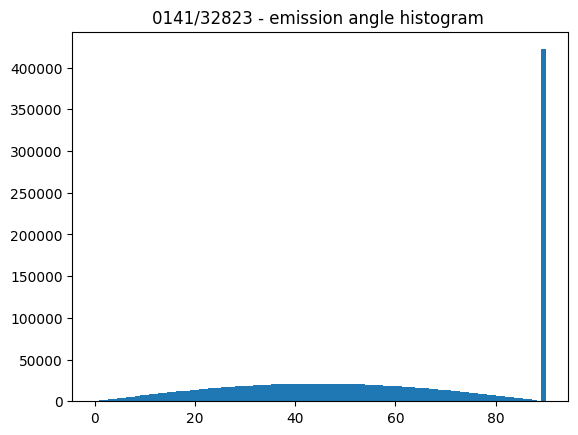

In [143]:
# Plot histogram for emission angle
plt.hist(emission[~np.isnan(emission)], bins=100)
plt.title(txt + ' - emission angle histogram ')

print('min - ' + str(round(np.nanmin(emission),4)))
print('max - ' + str(round(np.nanmax(emission),4)))

min - 0.0266
max - 128.3858


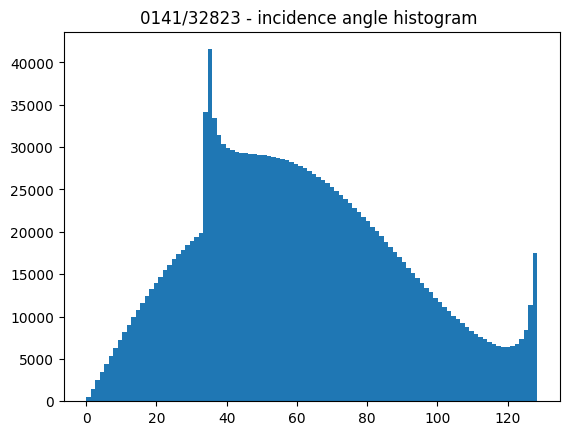

In [15]:
# plot histogram for incidence angle
plt.hist(incidence[~np.isnan(incidence)], bins=100)
plt.title(txt + ' - incidence angle histogram ')
print('min - ' + str(round(np.nanmin(incidence),4)))
print('max - ' + str(round(np.nanmax(incidence),4)))

In [16]:
# Explore quality image
np.nanmax(dqf), np.nanmin(dqf), np.nanmean(dqf)

(536, 0, 224.62559763590494)

Text(0.5, 1.0, 'DQF - Histogram')

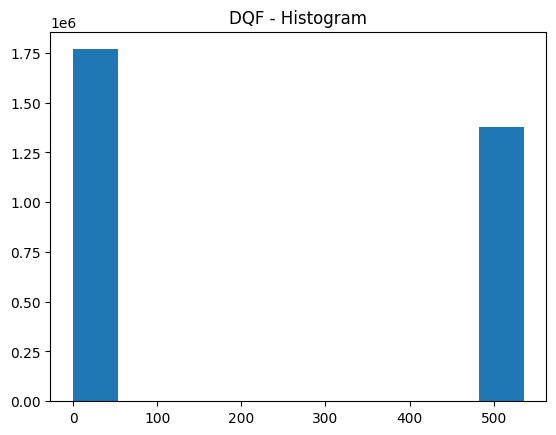

In [17]:
plt.hist(dqf[~np.isnan(dqf)], bins=10)
plt.title('DQF - Histogram')